# 图像特效-光晕

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
src = cv2.imread('../datas/sunset2.jpg')
gray = cv2.imread('../datas/sunset2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [9]:
def halo(src,radius=0.75,light=0.35,gradient=20):
    srcf = np.float32(src)
    if len(src.shape) < 3:
        srcf = cv2.cvtColor(src,cv2.COLOR_GRAY2RGB).astype(np.float32)
    dst = np.zeros_like(srcf)
    rows,cols = srcf.shape[0],srcf.shape[1]
    
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt(((i - rows) / 2) ** 2 + ((j - cols) / 2) ** 2)
            dmax = 1.0 / np.sqrt(rows * rows / 4 + cols * cols / 4)
            lum = 0.75 / (1.0 + np.exp(d * dmax - radius) * gradient) + light
            dst[i,j] = srcf[i,j] * lum
    dst = np.clip(dst,0,255)
    return np.uint8(dst)

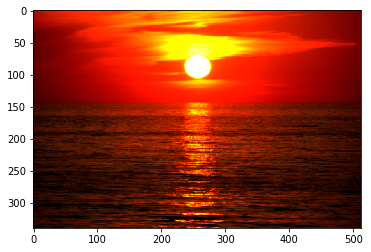

In [11]:
dst = halo(rgb,1.0,1.25)
plt.imshow(dst)

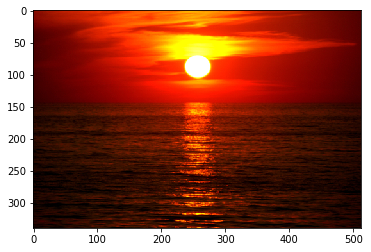

In [12]:
plt.imshow(rgb)